# Blood Glucose Control - EDA

**Name:** *Jonathan Gong*



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [2]:
import os
os.chdir(r"xxxxxxxxxxxxxxxxxxxxxxxxxx")
os.listdir()

['gluroo_500030.csv', 'gluroo_679372.csv']

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_500030 = pd.read_csv("gluroo_500030.csv")
df_679372 = pd.read_csv("gluroo_679372.csv")

Add label to distinguish between the PWD and concatenate the two datasets into one pandas dataframe

In [5]:
df_500030['user_id'] = 500030
df_679372['user_id'] = 679372

In [6]:
df_both = pd.concat([df_500030, df_679372], ignore_index=True)

Slightly cleaned the dataset to remove any rows that have from the "bgl" to the "trend" with all NaN values (likely some kind of error from the gluroo data collector?). There were 281 such rows.

In [7]:
df_cleaned = df_both.dropna(subset=df_both.iloc[:, 2:17].columns, how='all')

In [8]:
len(df_both) - len(df_cleaned)

281

In [9]:
df_cleaned.iloc[0]

date                    2024-05-01 00:00:27.029000-05:00
sender_id                                            NaN
bgl                                                114.0
bgl_date_millis                                      NaN
text                                                 NaN
template                                             NaN
msg_type                                             NaN
affects_fob                                          NaN
affects_iob                                          NaN
dose_units                                           NaN
food_g                                               NaN
food_glycemic_index                                  NaN
dose_automatic                                       NaN
fp_bgl                                               NaN
message_basal_change                                 NaN
__typename                                       Reading
trend                                               FLAT
user_id                        

In [26]:
df_cleaned = df_cleaned.copy()
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='mixed', utc=True)

In [27]:
df_cleaned['date']

0       2024-05-01 05:00:27.029000+00:00
1       2024-05-01 05:05:27.183000+00:00
2       2024-05-01 05:10:26.949000+00:00
3       2024-05-01 05:15:27.180000+00:00
4       2024-05-01 05:20:27.021000+00:00
                      ...               
59907          2024-08-01 03:44:59+00:00
59908          2024-08-01 03:48:03+00:00
59909          2024-08-01 03:52:06+00:00
59910          2024-08-01 03:55:08+00:00
59911          2024-08-01 03:58:10+00:00
Name: date, Length: 59631, dtype: datetime64[ns, UTC]

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

I created a visualization for the progression of bgl levels for the two PWD and the derivative of their bgl level graphs. This will tell us more about the progression and intensity of their glucose spikes. The visualization was plotted for the entire length of their datasets, but for more effective visualization, an adjustor for the time interval where the graph is shown is added.

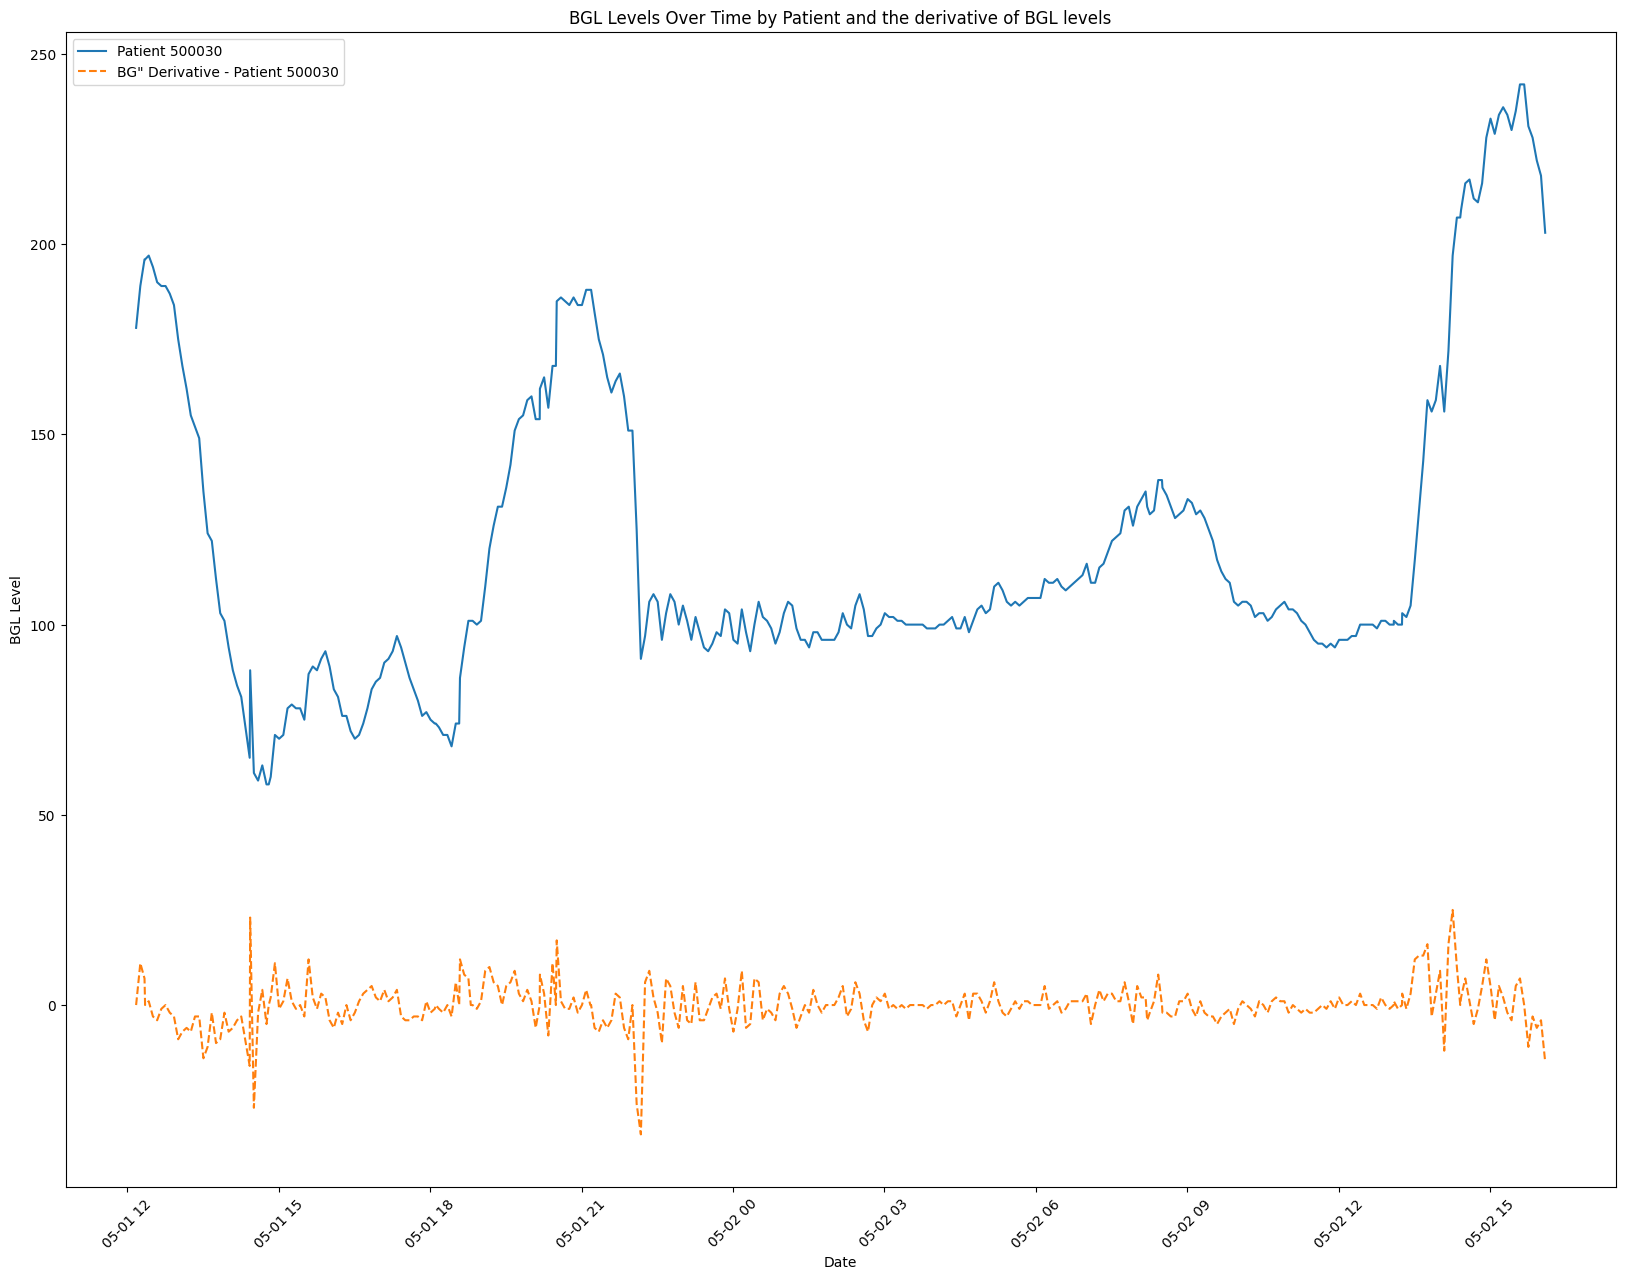

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

user_ids = [500030] # can add more patients to the list such as [500030, 679372]

# can replace user_ids with this when wanting to visualize all patients df_cleaned['user_id'].unique()
for patient_id in user_ids:

    # Filter data for each patient
    patient_data = df_cleaned[df_cleaned['user_id'] == patient_id].copy()
    patient_data = patient_data.sort_values(by='date')

    # Patients data on a time interval
    patient_data = patient_data.iloc[150:500]
    
    # Plot the patient's data
    plt.plot(patient_data['date'], patient_data['bgl'], label=f'Patient {patient_id}')

     # Compute the derivative (rate of change) of BGL levels
    patient_data['BGL_Derivative'] = patient_data['bgl'].diff().fillna(0)
    
    # Plot the derivative
    plt.plot(patient_data['date'], patient_data['BGL_Derivative'], '--', label=f'BG" Derivative - Patient {patient_id}')

plt.xlabel('Date')
plt.ylabel('BGL Level and their derivative')
plt.title('BGL Levels Over Time by Patient and the derivative of BGL levels')
plt.legend()

plt.show()

This visualization is based on one PWD's bgl progression for a day at a time. That way, one can monitor how changes in diet, insulin, etc effect their bgl throughout the day. THe visualization does not have the derivative of the bgl progression included, but it can be implemented.



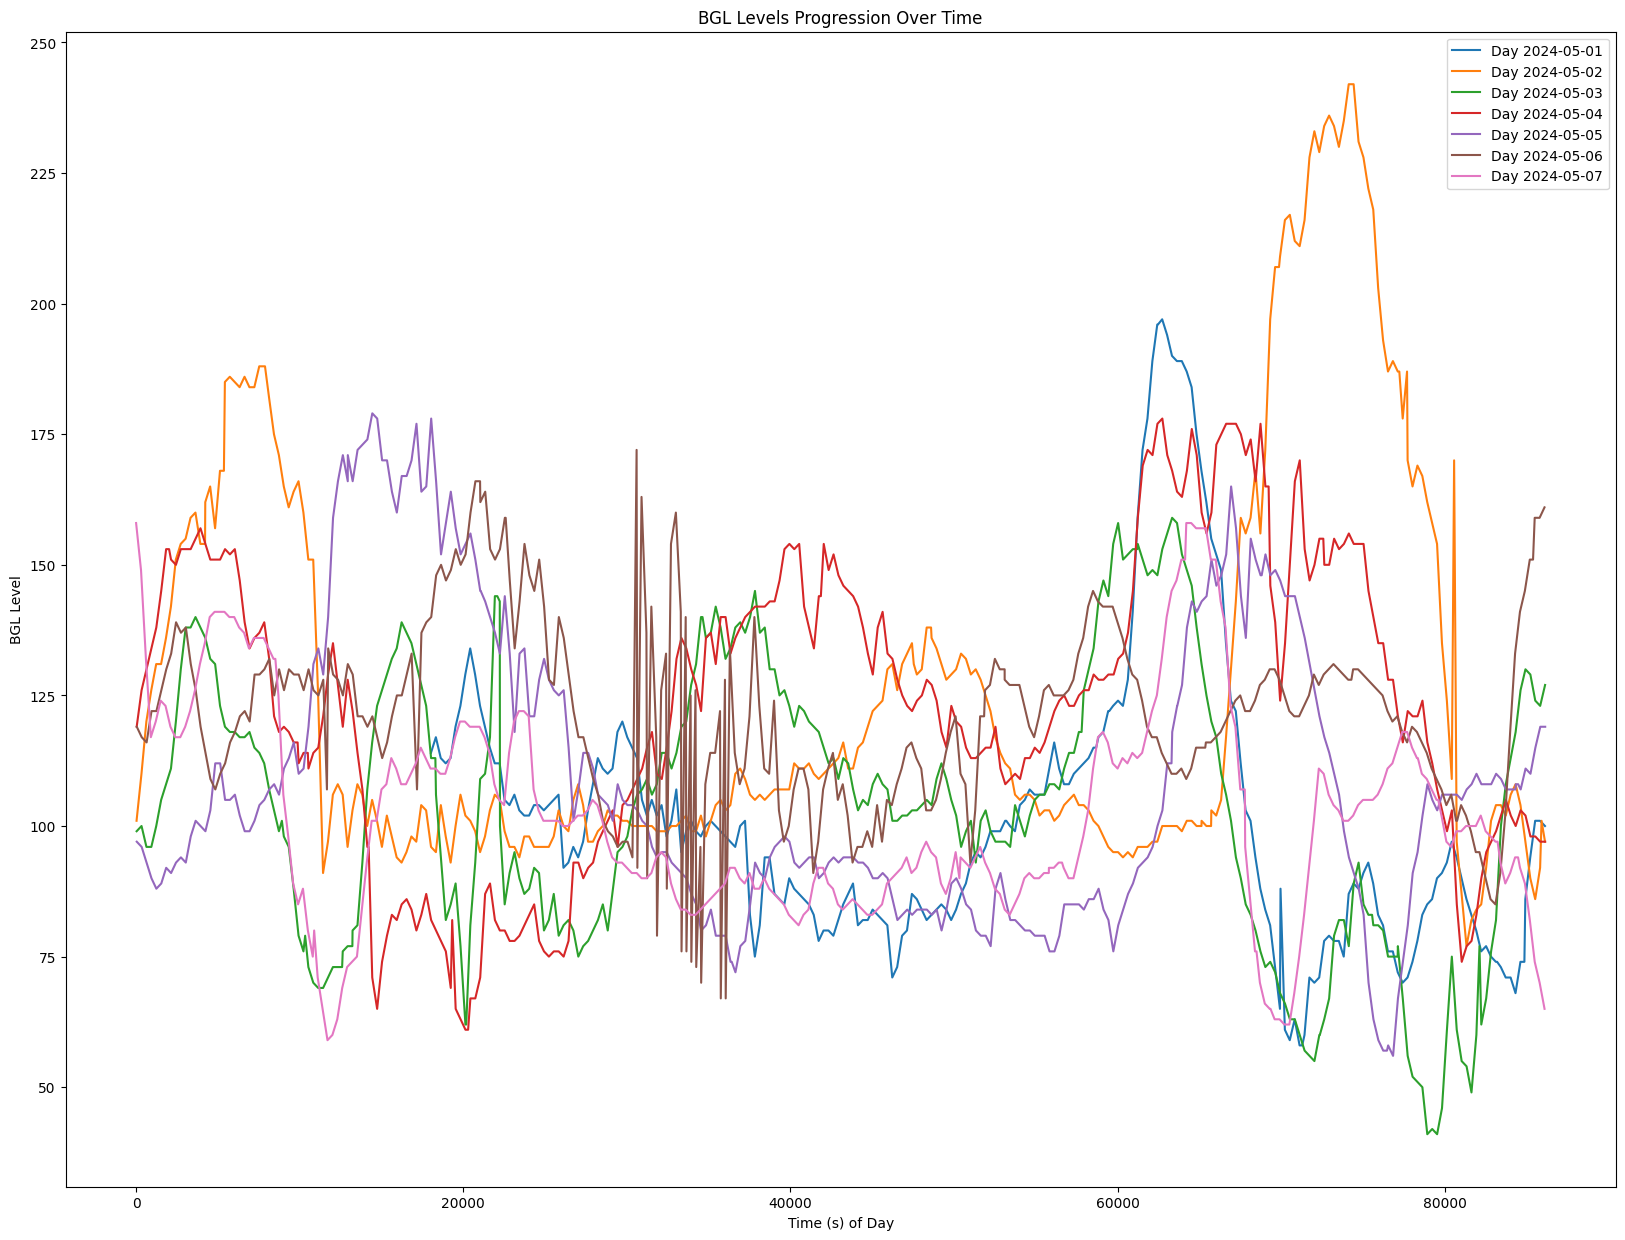

In [46]:
import seaborn as sns

# extract only the time part (hour:minute:second) of the date
df_cleaned['time'] = df_cleaned['date'].dt.time

# extract only the date part (year-month-day) of the date
df_cleaned['day'] = df_cleaned['date'].dt.date

# extract only the hour part of the date
unique_days = df_cleaned['day'].unique()

# Select only the first 7 days for better visualization, can be tuned to any number of days
some_days = unique_days[:7]

# Convert time to seconds so pyplot can accept the values
df_cleaned['time_in_seconds'] = df_cleaned['date'].dt.hour * 3600 + df_cleaned['date'].dt.minute * 60 + df_cleaned['date'].dt.second

plt.figure(figsize=(20,15))

for i, day in enumerate(some_days):

    # Filter data for a specific patient to avoid overlapping data. This visualization would be deisigned to see only one pwd's data at a time
    patient_data = df_cleaned[df_cleaned['user_id'] == 500030].copy()

    # Filter data for the current day
    day_data = patient_data[patient_data['day'] == day]
    
    # Plot BGL levels with time on the x-axis and BGL levels on the y-axis
    plt.plot(day_data['time_in_seconds'], day_data['bgl'], label=f'Day {day}')

plt.xlabel('Time (s) of Day')
plt.ylabel('BGL Level')
plt.title('BGL Levels Progression Over Time')
plt.legend()

plt.show()

not sure what happened on march 6th, but it does not look ideal

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. In the project goals, I see an aim to identify unlabelled meals. As there may be more factors that can impact glucose spikes such as physical activity, stress, etc. Will the project be working to identify and differentiate these factors?
2. Will there be more data to work with? If so, how diverse is the collection of datasets? 
3. Are there other existing products that compete with glucoo in prandial and postprandial blood glucose level analysis? If so, what would glucoo be doing different either with the hardware or software involved?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`